In [13]:
from RegistrationObj import RegistrationObj, IterativePairwise
import scipy.stats as st
from utils import colour_map, min_max_normalisation, mae, mae_permutation, pcd_to_tif, visualise_pcd
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
from open3d import JVisualizer
import tifffile.tifffile as tiff
import copy 
%matplotlib notebook

# Introduction

# 18ss Posterior subset

In [29]:
pos_path_source_list_18ss = ["./datasets/4-TCF_alignment/18ss/18ss_pos_1_Detailed.csv",
                  "./datasets/4-TCF_alignment/18ss/18ss_pos_3_Detailed.csv"]

tcf_color_path_source_list_18ss = ["./datasets/4-TCF_alignment/18ss/18ss_TCF_mRNA_1_Detailed.csv",
                  "./datasets/4-TCF_alignment/18ss/18ss_TCF_mRNA_3_Detailed.csv"]

pos_path_target_18ss = "./datasets/4-TCF_alignment/18ss/18ss_pos_2_Detailed.csv"

tcf_color_path_target_18ss = "./datasets/4-TCF_alignment/18ss/18ss_TCF_mRNA_2_Detailed.csv"

other_source_channels = [["./datasets/4-TCF_alignment/18ss/18ss_tbxta_1_Detailed.csv",
                              "./datasets/4-TCF_alignment/18ss/18ss_sox2_1_Detailed.csv"],
                         ["./datasets/4-TCF_alignment/18ss/18ss_tbxta_3_Detailed.csv",
                              "./datasets/4-TCF_alignment/18ss/18ss_sox2_3_Detailed.csv"]]
other_target_channels = ["./datasets/4-TCF_alignment/18ss/18ss_tbxta_2_Detailed.csv",
                         "./datasets/4-TCF_alignment/18ss/18ss_sox2_2_Detailed.csv"]

## TCF

In [30]:
tcf_18ss = IterativePairwise(pos_path_source_list_18ss, pos_path_target_18ss, tcf_color_path_source_list_18ss, tcf_color_path_target_18ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0],
                            other_source_channels = other_source_channels, other_target_channels = other_target_channels)

tcf18ss_pcd = tcf_18ss.iterative_registration(jupyter_visualise = True, verbose = False)

0 - Processing Other Source and Target channels
Using median averaging
1 - Processing Other Source and Target channels
Using median averaging
Using median averaging
[[array([[17.6493 ],
       [ 5.61111],
       [16.5313 ],
       ...,
       [ 3.6875 ],
       [ 1.23077],
       [ 2.64238]]), array([[6.081955],
       [4.52778 ],
       [6.49864 ],
       ...,
       [1.075   ],
       [0.788462],
       [0.953642]])]]
0 - Processing Other Source and Target channels
Using median averaging
1 - Processing Other Source and Target channels
Using median averaging
Using median averaging
[[array([[17.6493 ],
       [ 5.61111],
       [16.5313 ],
       ...,
       [ 3.6875 ],
       [ 1.23077],
       [ 2.64238]]), array([[6.081955],
       [4.52778 ],
       [6.49864 ],
       ...,
       [1.075   ],
       [0.788462],
       [0.953642]])], [array([[13.4811 ],
       [20.6813 ],
       [26.1006 ],
       ...,
       [ 3.6875 ],
       [ 1.23077],
       [ 2.64238]]), array([[3.5642  ],
    

JVisualizer with 1 geometries

In [6]:
tcf_18ss.registration_obj

[RegistrationResult with fitness=9.419904e-01, inlier_rmse=4.490111e+00, and correspondence_set size of 1770
 Access transformation to get result.,
 RegistrationResult with fitness=9.761905e-01, inlier_rmse=4.388004e+00, and correspondence_set size of 1927
 Access transformation to get result.]

In [25]:
tbxta_18ss = tcf_18ss.other_registered_channels[0]
sox2_18ss = tcf_18ss.other_registered_channels[1]

In [7]:
tcf_18ss
print(tcf_18ss.combined_results)
#print(tcf_18ss.registered_color)

[[0.9419904204364024, 4.4901114662842225, 4.766621155450878, 15.523415308797912], [0.9761904761904762, 4.388003629332893, 4.4950281080971095, 9.190546288242292]]


In [26]:
tbxta_18ss

array([[14.48645],
       [17.43298],
       [21.31595],
       ...,
       [ 3.6875 ],
       [ 1.23077],
       [ 2.64238]])

### Visualise 

<IPython.core.display.Javascript object>


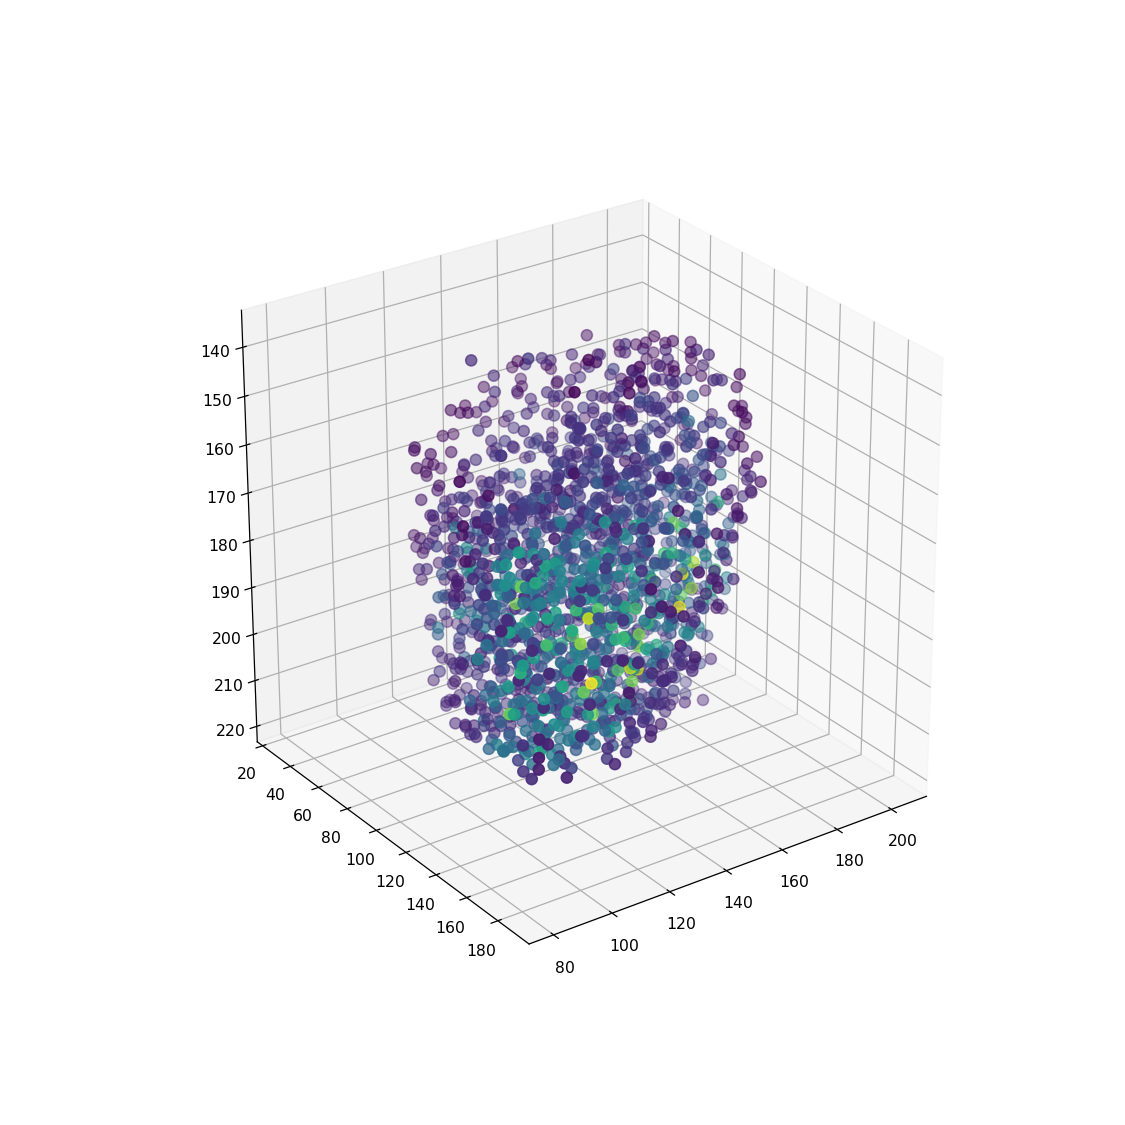

In [20]:
sox2_18ss_pcd = copy.deepcopy(tcf18ss_pcd)
sox2_rgb, _ = colour_map(sox2_18ss,"viridis")
sox2_18ss_pcd.colors=o3d.utility.Vector3dVector(sox2_rgb)
visualise_pcd(sox2_18ss_pcd)

<IPython.core.display.Javascript object>


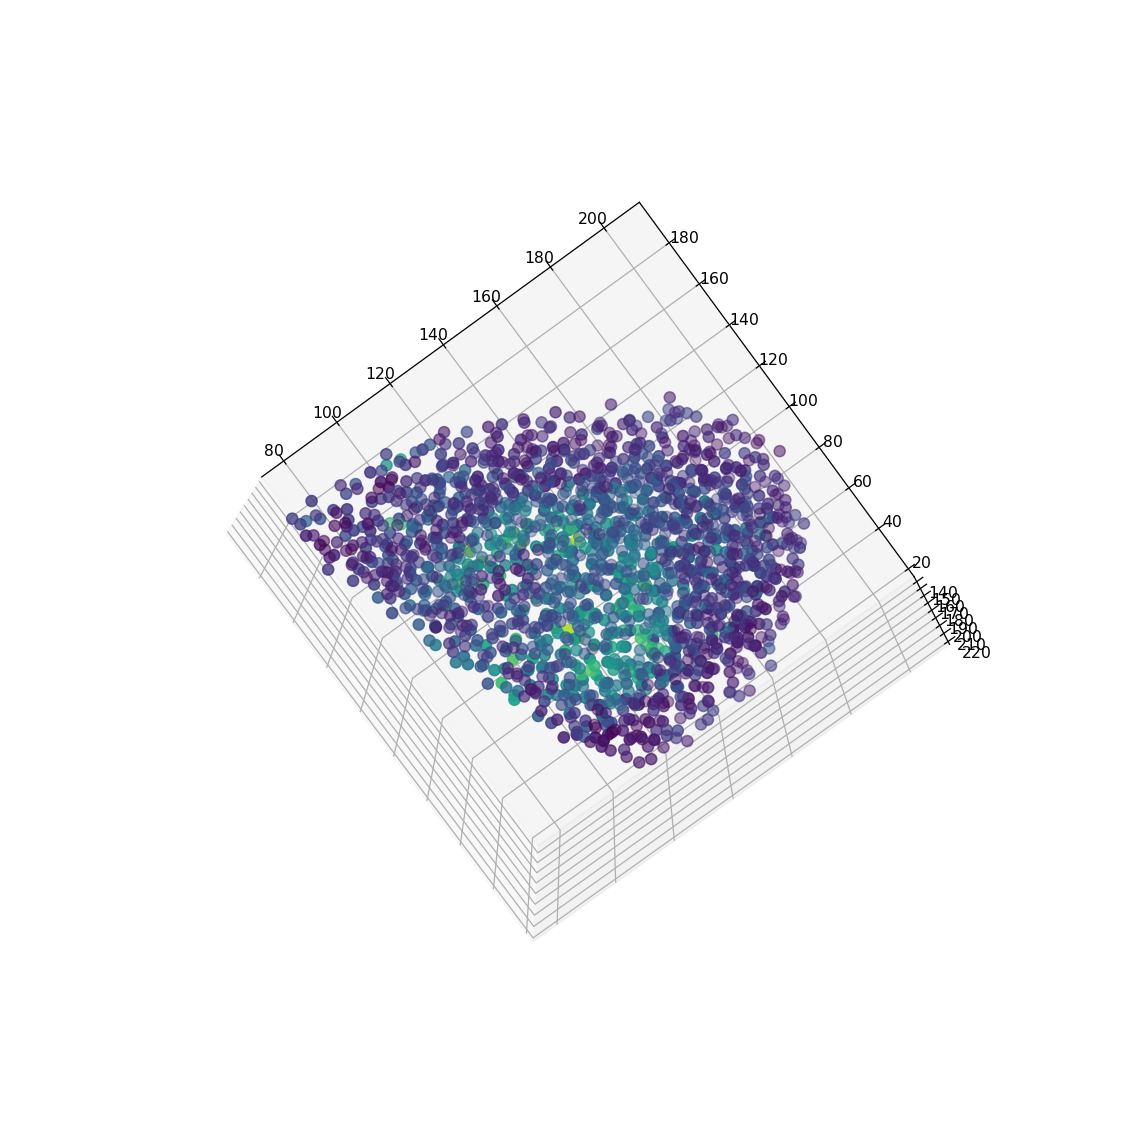

In [9]:
visualise_pcd(tcf_18ss.target_pcd)


<IPython.core.display.Javascript object>


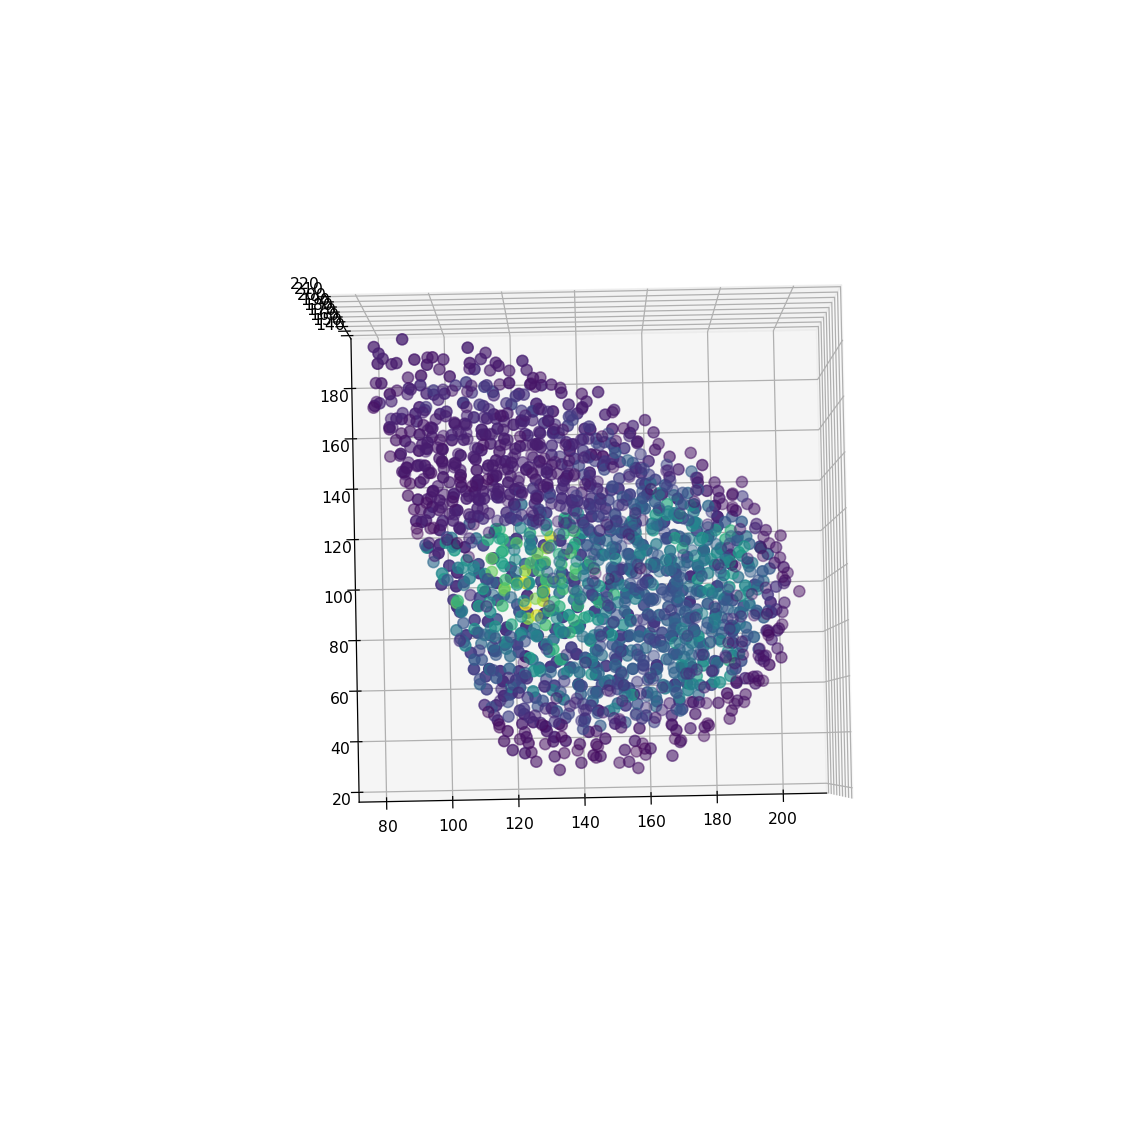

In [21]:
tbxta_18ss_pcd = copy.deepcopy(tcf18ss_pcd)
tbxta_rgb, _ = colour_map(tbxta_18ss,"viridis")
tbxta_18ss_pcd.colors=o3d.utility.Vector3dVector(tbxta_rgb)
visualise_pcd(tbxta_18ss_pcd)

### Export 

In [24]:
hull, _ = tcf18ss_pcd.compute_convex_hull()
hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)
hull_ls.paint_uniform_color((1, 0, 0))
o3d.visualization.draw_geometries([tcf18ss_pcd, hull_ls])

[Open3D WARNING] GLFW Error: X11: Failed to open display localhost:10.0
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.


In [55]:
pcd_to_tif(tcf18ss_pcd, tcf_18ss.registered_color, 800, 800, 110, filename = "aligned_tcf_18ss.tif")

Saving color channel as tcf_18ss.tif
Saving DAPI channel as DAPI_tcf_18ss.tif


In [13]:
pcd_to_tif(tcf_18ss.target_pcd, np.asarray(tcf_18ss.target_pcd.colors), 800, 800, 110, filename = "aligned_tcf_18ss.tif")

array([[ 9.86656  ],
       [11.1594975],
       [12.413615 ],
       ...,
       [ 1.95833  ],
       [ 2.88462  ],
       [ 3.03146  ]])

In [18]:
tcf_18ss.target_color

AttributeError: 'IterativePairwise' object has no attribute 'target_color'

## tbxta

In [56]:
tbxta_18ss = IterativePairwise(pos_path_source_list_18ss, pos_path_target_18ss, tbxta_color_path_source_list_18ss, tbxta_color_path_target_18ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])

tbxta18ss_pcd = tbxta_18ss.iterative_registration(jupyter_visualise = True, verbose = False)

Using median averaging
Using median averaging


JVisualizer with 1 geometries

In [57]:
tbxta_18ss
print(tbxta_18ss.combined_results)

[[0.9414582224587547, 4.482264904894572, 4.760981207629679, 10.464185596631106], [0.9772036474164134, 4.415565577772946, 4.51857255081586, 8.646411155754116]]


In [64]:
tbxta_18ss.target_pcd

PointCloud with 1689 points.

### Visualize

<IPython.core.display.Javascript object>


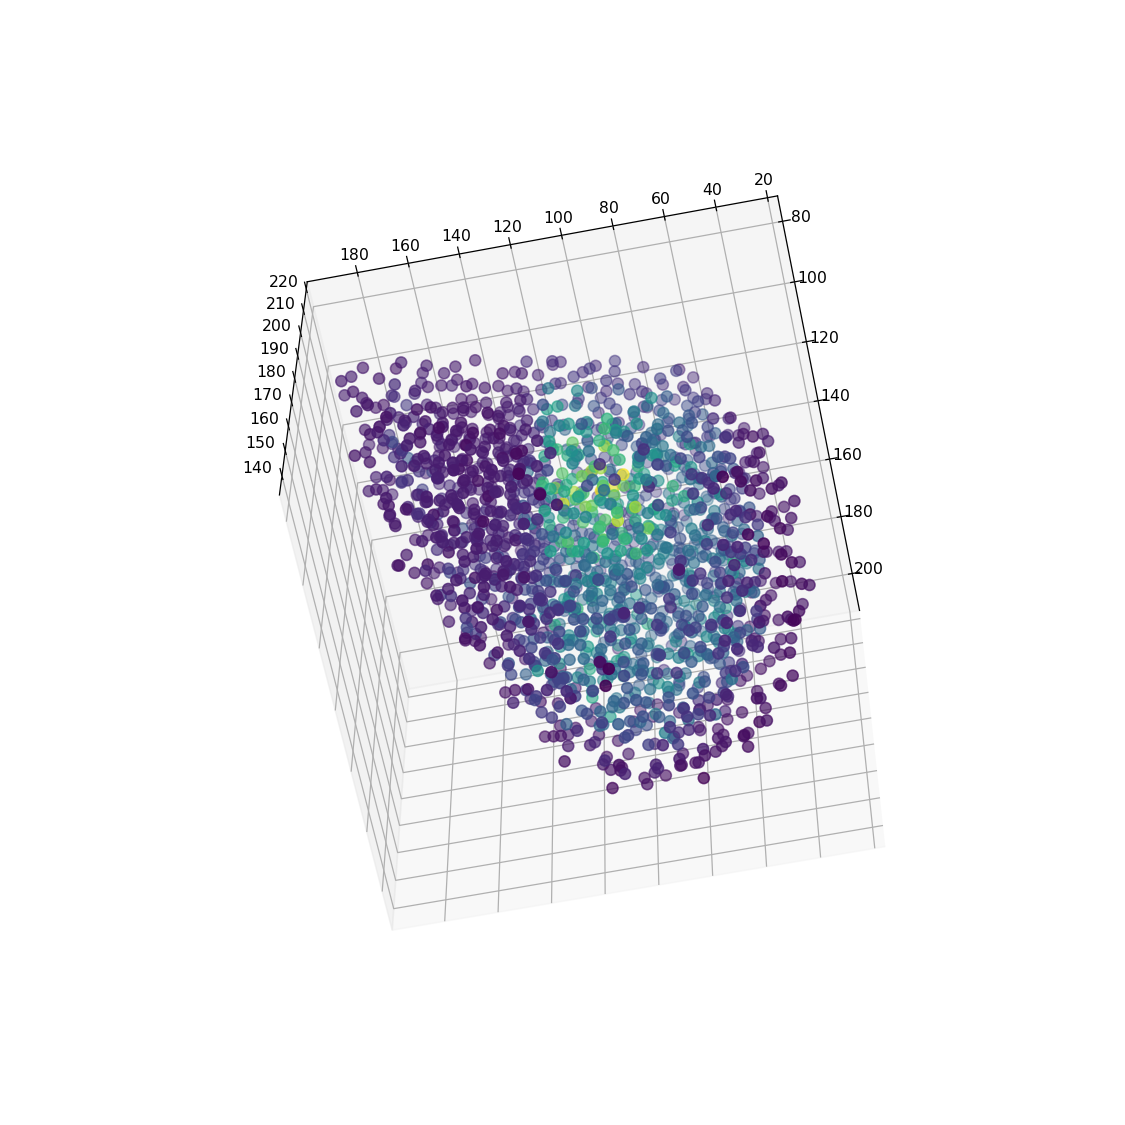

In [66]:
visualise_pcd(tbxta18ss_pcd)


### Export`

In [59]:
pcd_to_tif(tbxta18ss_pcd, tbxta_18ss.registered_color, 800, 800, 110, filename = "tbxta_18ss.tif")

Saving color channel as tbxta_18ss.tif
Saving DAPI channel as DAPI_tbxta_18ss.tif


## sox2

In [ ]:
pos_path_source_list_18ss = ["./datasets/4-TCF_alignment/18ss/18ss_pos_1_Detailed.csv",
                  "./datasets/4-TCF_alignment/18ss/18ss_pos_3_Detailed.csv"]

tcf_color_path_source_list_18ss = ["./datasets/4-TCF_alignment/18ss/18ss_TCF_mRNA_1_Detailed.csv",
                  "./datasets/4-TCF_alignment/18ss/18ss_TCF_mRNA_3_Detailed.csv"]

pos_path_target_18ss = "./datasets/4-TCF_alignment/18ss/18ss_pos_2_Detailed.csv"

tcf_color_path_target_18ss = "./datasets/4-TCF_alignment/18ss/18ss_TCF_mRNA_2_Detailed.csv"

other_source_channels = [["./datasets/4-TCF_alignment/18ss/18ss_tbxta_1_Detailed.csv",
                              "./datasets/4-TCF_alignment/18ss/18ss_sox2_1_Detailed.csv"],
                         ["./datasets/4-TCF_alignment/18ss/18ss_tbxta_3_Detailed.csv",
                              "./datasets/4-TCF_alignment/18ss/18ss_sox2_3_Detailed.csv"]]
other_target_channels = ["./datasets/4-TCF_alignment/18ss/18ss_tbxta_2_Detailed.csv",
                         "./datasets/4-TCF_alignment/18ss/18ss_sox2_2_Detailed.csv"]

In [60]:
sox2_18ss = IterativePairwise(pos_path_source_list_18ss, pos_path_target_18ss, sox2_color_path_source_list_18ss, sox2_color_path_target_18ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])

sox218ss_pcd = sox2_18ss.iterative_registration(jupyter_visualise = True, verbose = False)

Using median averaging
Using median averaging


JVisualizer with 1 geometries

In [61]:
sox2_18ss
print(sox2_18ss.combined_results)

[[0.9414582224587547, 4.479743361483342, 4.758302869546184, 9.725008071074267], [0.9761904761904762, 4.387915704114131, 4.494938038360817, 9.286069513421367]]


### Visualize

<IPython.core.display.Javascript object>


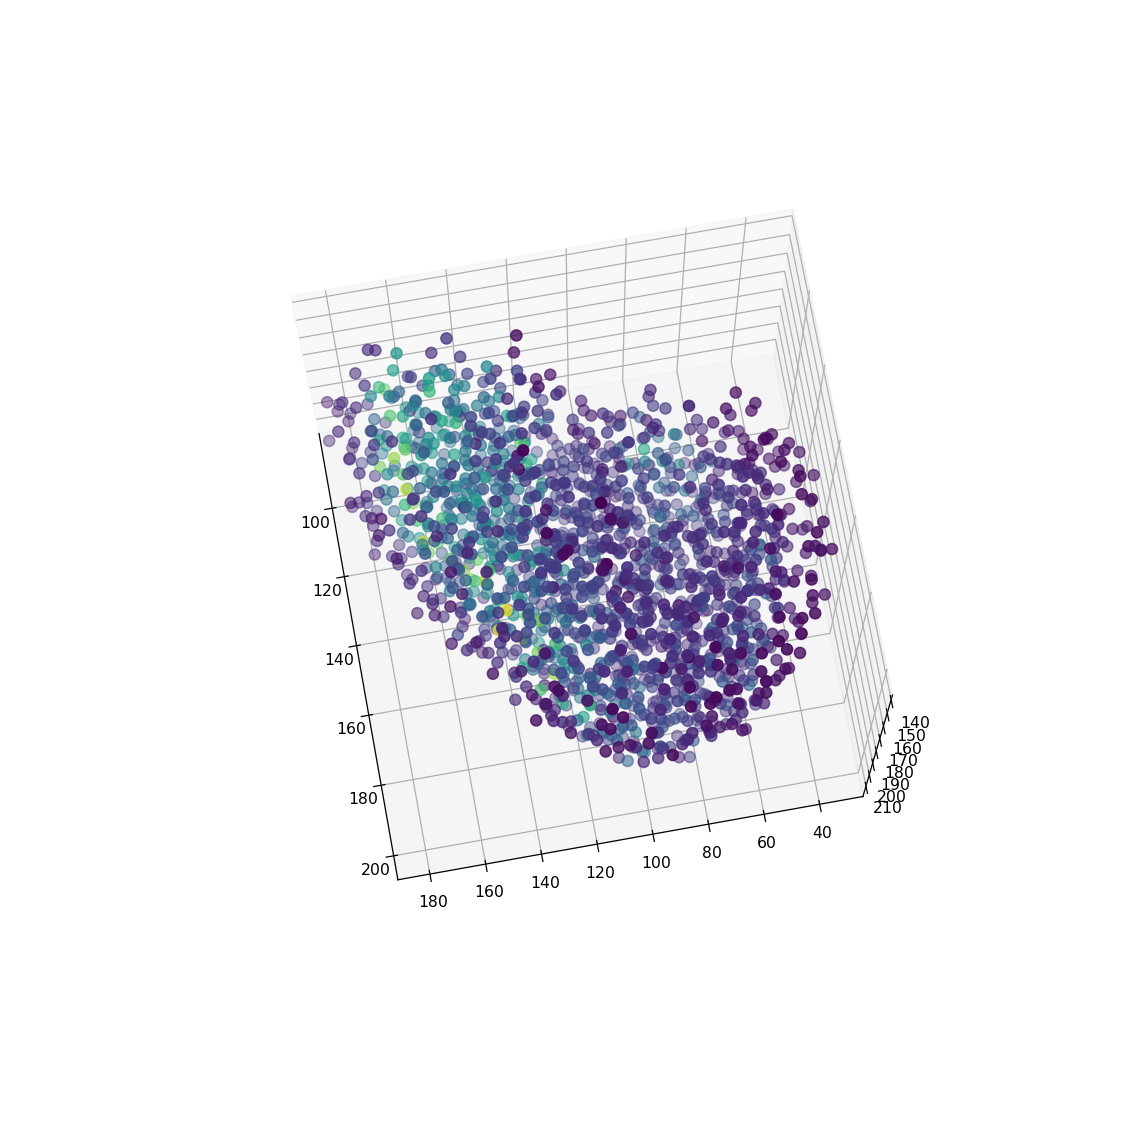

In [68]:
visualise_pcd(sox218ss_pcd)


### Export 

In [63]:
pcd_to_tif(sox218ss_pcd, sox2_18ss.registered_color, 800, 800, 110, filename = "sox2_18ss.tif")

Saving color channel as sox2_18ss.tif
Saving DAPI channel as DAPI_sox2_18ss.tif


# 21ss TCF-GFP

In [6]:
pos_path_source_list_21ss = ["./datasets/4-multiway/21ss/21ss_position_2_Detailed.csv", 
                            "./datasets/4-multiway/21ss/21ss_position_3_Detailed.csv", 
                            "./datasets/4-multiway/21ss/21ss_position_4_Detailed.csv", 
                            "./datasets/4-multiway/21ss/21ss_position_5_Detailed.csv", 
                            "./datasets/4-multiway/21ss/21ss_position_6_Detailed.csv"]

color_path_source_list_21ss = ["./datasets/4-multiway/21ss/21ss_TCF_mRNA_2_Detailed.csv", 
                            "./datasets/4-multiway/21ss/21ss_TCF_mRNA_3_Detailed.csv", 
                            "./datasets/4-multiway/21ss/21ss_TCF_mRNA_4_Detailed.csv", 
                            "./datasets/4-multiway/21ss/21ss_TCF_mRNA_5_Detailed.csv", 
                            "./datasets/4-multiway/21ss/21ss_TCF_mRNA_6_Detailed.csv"]

pos_path_target_21ss = "./datasets/4-multiway/21ss/21ss_position_1_Detailed.csv"
color_path_target_21ss = "./datasets/4-multiway/21ss/21ss_TCF_mRNA_1_Detailed.csv"

In [7]:
tcf_21ss = IterativePairwise(pos_path_source_list_21ss, pos_path_target_21ss, color_path_source_list_21ss, color_path_target_21ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])

tcf_21ss.iterative_registration(jupyter_visualise = True, verbose = False)

Using median averaging
Using median averaging
Using median averaging
Using median averaging
Using median averaging


JVisualizer with 1 geometries

PointCloud with 2445 points.

In [19]:
visualizer = JVisualizer()
visualizer.add_geometry(tcf_21ss.source_pcd[0])
visualizer.show()

JVisualizer with 1 geometries

## Results

In [19]:
tcf_21ss
print(tcf_21ss.combined_results)
print(tcf_21ss.registered_color)

NameError: name 'tcf_21ss' is not defined

# 24ss TCF-GFP

In [9]:
pos_path_source_list_24ss = ["./datasets/4-multiway/24ss/24ss_positions_2_Detailed.csv", 
                            "./datasets/4-multiway/24ss/24ss_positions_4_Detailed.csv", 
                            "./datasets/4-multiway/24ss/24ss_positions_5_Detailed.csv"]

color_path_source_list_24ss = ["./datasets/4-multiway/24ss/24ss_TCF_mRNA_2_Detailed.csv", 
                            "./datasets/4-multiway/24ss/24ss_TCF_mRNA_4_Detailed.csv", 
                            "./datasets/4-multiway/24ss/24ss_TCF_mRNA_5_Detailed.csv"]

pos_path_target_24ss = "./datasets/4-multiway/24ss/24ss_positions_1_Detailed.csv"
color_path_target_24ss = "./datasets/4-multiway/24ss/24ss_TCF_mRNA_1_Detailed.csv"

In [10]:
tcf_24ss = IterativePairwise(pos_path_source_list_24ss, pos_path_target_24ss, color_path_source_list_24ss, color_path_target_24ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])

tcf_24ss.iterative_registration(jupyter_visualise = True, verbose = False)

Using median averaging
Using median averaging
Using median averaging


JVisualizer with 1 geometries

PointCloud with 1133 points.

## Results

In [11]:
print(tcf_24ss)
print(tcf_24ss.combined_results)
print(tcf_24ss.registered_color)

--- Iterative Pairwise Object--- 
Algorithm used = colored_icp
Source file names : ['./datasets/4-multiway/24ss/24ss_positions_2_Detailed.csv', './datasets/4-multiway/24ss/24ss_positions_4_Detailed.csv', './datasets/4-multiway/24ss/24ss_positions_5_Detailed.csv']
Number of source files : 3
Target file name: ./datasets/4-multiway/24ss/24ss_positions_1_Detailed.csv
[[0.9461663947797716, 4.426941602180537, 4.67881931402874, 14.119038821162999], [0.9910536779324056, 3.991341263841081, 4.027371425701231, 14.164425143981822], [0.9497161394971614, 4.268511090435856, 4.494512531603254, 16.383053511181668]]
[[11.2545 ]
 [13.1143 ]
 [ 9.55597]
 ...
 [28.0678 ]
 [ 5.54132]
 [ 4.15403]]


# 27ss TCF-GFP

In [12]:
pos_path_source_list_27ss = ["./datasets/4-multiway/27ss/27ss_positions_2_Detailed.csv", 
                            "./datasets/4-multiway/27ss/27ss_positions_3_Detailed.csv", 
                            "./datasets/4-multiway/27ss/27ss_positions_4_Detailed.csv"]

color_path_source_list_27ss = ["./datasets/4-multiway/27ss/27ss_TCF_mRNA_2_Detailed.csv", 
                            "./datasets/4-multiway/27ss/27ss_TCF_mRNA_3_Detailed.csv", 
                            "./datasets/4-multiway/27ss/27ss_TCF_mRNA_4_Detailed.csv"]

pos_path_target_27ss = "./datasets/4-multiway/27ss/27ss_positions_1_Detailed.csv"
color_path_target_27ss = "./datasets/4-multiway/27ss/27ss_TCF_mRNA_1_Detailed.csv"

In [13]:
tcf_27ss = IterativePairwise(pos_path_source_list_27ss, pos_path_target_27ss, color_path_source_list_27ss, color_path_target_27ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])

tcf_27ss.iterative_registration(jupyter_visualise = True, verbose = False)

Using median averaging
Using median averaging
Using median averaging


JVisualizer with 1 geometries

PointCloud with 1072 points.

## Results

In [14]:
print(tcf_27ss)
print(tcf_27ss.combined_results)
print(tcf_27ss.registered_color)

--- Iterative Pairwise Object--- 
Algorithm used = colored_icp
Source file names : ['./datasets/4-multiway/27ss/27ss_positions_2_Detailed.csv', './datasets/4-multiway/27ss/27ss_positions_3_Detailed.csv', './datasets/4-multiway/27ss/27ss_positions_4_Detailed.csv']
Number of source files : 3
Target file name: ./datasets/4-multiway/27ss/27ss_positions_1_Detailed.csv
[[0.8728897715988083, 4.405315432648464, 5.0468175661854415, 13.286058460043467], [0.8349650349650349, 4.7269094728480825, 5.661206487581874, 10.746549214754095], [0.8423326133909287, 4.738888921694707, 5.625911719858076, 13.61640235463426]]
[[4.0697 ]
 [3.18208]
 [2.44042]
 ...
 [3.24431]
 [3.5399 ]
 [2.70443]]


# 30ss TCF-GFP

In [15]:
pos_path_source_list_30ss = ["./datasets/4-multiway/30ss/30ss_positions_2_Detailed.csv", 
                            "./datasets/4-multiway/30ss/30ss_positions_3_Detailed.csv", 
                            "./datasets/4-multiway/30ss/30ss_positions_4_Detailed.csv"]

color_path_source_list_30ss = ["./datasets/4-multiway/30ss/30ss_TCF_mRNA_2_Detailed.csv", 
                            "./datasets/4-multiway/30ss/30ss_TCF_mRNA_3_Detailed.csv", 
                            "./datasets/4-multiway/30ss/30ss_TCF_mRNA_4_Detailed.csv"]

pos_path_target_30ss = "./datasets/4-multiway/30ss/30ss_positions_1_Detailed.csv"
color_path_target_30ss = "./datasets/4-multiway/30ss/30ss_TCF_mRNA_1_Detailed.csv"

In [16]:
tcf_30ss = IterativePairwise(pos_path_source_list_30ss, pos_path_target_30ss, color_path_source_list_30ss, color_path_target_30ss,
                             algorithm = "colored_icp",pos_skiprows = [0,1,2], pos_usecols = [0,1,2], color_skiprows = [0,1,2], color_usecols = [0])

tcf_30ss.iterative_registration(jupyter_visualise = True, verbose = False)

Using median averaging
Using median averaging
Using median averaging


JVisualizer with 1 geometries

PointCloud with 723 points.

## Results

In [17]:
print(tcf_30ss)
print(tcf_30ss.combined_results)
print(tcf_30ss.registered_color)

--- Iterative Pairwise Object--- 
Algorithm used = colored_icp
Source file names : ['./datasets/4-multiway/30ss/30ss_positions_2_Detailed.csv', './datasets/4-multiway/30ss/30ss_positions_3_Detailed.csv', './datasets/4-multiway/30ss/30ss_positions_4_Detailed.csv']
Number of source files : 3
Target file name: ./datasets/4-multiway/30ss/30ss_positions_1_Detailed.csv
[[0.9712140175219024, 4.205840509801781, 4.330498153777865, 13.25255238679289], [0.981838819523269, 4.522451523199233, 4.606103805709276, 14.062648630814083], [0.9267605633802817, 4.469329716623448, 4.822529025535939, 12.449271770604414]]
[[11.97485  ]
 [10.294    ]
 [12.047    ]
 [ 9.6051   ]
 [13.5733   ]
 [ 6.493    ]
 [15.1822   ]
 [14.0903   ]
 [12.8005   ]
 [12.95445  ]
 [13.576    ]
 [10.408    ]
 [ 8.29087  ]
 [27.0825   ]
 [ 6.62229  ]
 [17.3099   ]
 [14.8464   ]
 [15.3465   ]
 [ 8.08554  ]
 [11.5319   ]
 [ 9.89793  ]
 [12.0415   ]
 [ 2.8231   ]
 [ 9.317835 ]
 [ 4.85589  ]
 [10.312835 ]
 [ 7.04905  ]
 [ 5.87414  ]
 [ 